# Pointwise Mutual Information

## Step 1

In [1]:
import re
from typing import List, Tuple, Dict
from collections import Counter
import nltk
from nltk.corpus import brown
from numpy import log2


words = brown.words()
unigram_counter = Counter(words)
def get_pmi(sents: List[List[str]], words: List[str]) -> Tuple[Counter[str], Counter[str]]:
    bigrams = [(sent[i], sent[i + 1])  for sent in sents for i in range(len(sent) - 1)]
    bigram_counter = Counter(bigrams)
    corpus_size = len(words)

    bigram2pmi = Counter()
    bigram2neg_pmi = Counter()

    for w1, w2 in bigrams:
        bigram_freq = bigram_counter[(w1, w2)]
        w1_freq = unigram_counter[w1]
        w2_freq = unigram_counter[w2]
        bigram2pmi[(w1, w2)] = log2(corpus_size * bigram_freq/(w1_freq * w2_freq)) if (w1_freq > 10) and (w2_freq > 10) else 0
        bigram2neg_pmi[(w1, w2)] = -log2(corpus_size * bigram_freq/(w1_freq * w2_freq)) if (w1_freq > 10) and (w2_freq > 10) else 0
    return bigram2pmi, bigram2neg_pmi, bigrams, bigram_counter
        
bigram2pmi, bigram2neg_pmi, bigrams, bigram_counter = get_pmi(brown.sents(), brown.words())
print(bigram2pmi.most_common(20))
print(bigram2neg_pmi.most_common(20))


[(('Hong', 'Kong'), 16.687743488390954), (('Viet', 'Nam'), 16.14717510702825), (('Simms', 'Purdew'), 16.05971226577791), (('Herald', 'Tribune'), 15.794658692307467), (('Lo', 'Shu'), 15.75485768424949), (('WTV', 'antigen'), 15.669127810223607), (('Puerto', 'Rico'), 15.562212606307096), (('Internal', 'Revenue'), 15.562212606307096), (('Saxon', 'Shore'), 15.314285092863509), (('Export-Import', 'Bank'), 15.28919411190068), (('carbon', 'tetrachloride'), 15.261817672969373), (('Common', 'Market'), 15.240284511419732), (('unwed', 'mothers'), 15.240284511419732), (('Beverly', 'Hills'), 15.224342967550712), (('Kohnstamm', 'reactivity'), 15.198807875443574), (('Half', 'Moon'), 15.102780987669798), (('peaceful', 'coexistence'), 15.04388729861623), (('Armed', 'Forces'), 14.993738228374507), (('Willie', 'Mays'), 14.987303770249861), (('Virgin', 'Islands'), 14.977250105585938)]
[(('the', '.'), 11.379947331640476), (('the', ','), 10.621351191539276), (('and', '.'), 10.212223352362988), (('of', 'of'),

In [2]:
for bigram, _ in bigram2neg_pmi.most_common(20):
    print(bigram, ' '.join(words[bigrams.index(bigram) - 10: bigrams.index(bigram) + 10]))
print(unigram_counter.most_common(10))

('the', '.') men posted a few hundred yards away in the windless shelter of the trees . The two men whipped their
('the', ',') , the Yale athlete whose sobriquet was `` the father of American football '' . He was placed in charge
('and', '.') you are taking things too seriously and had better stop ! ! Or a bored dog because you are more
('of', 'of') the meanings of number and chimney make it clear that up is syntactically a second complement in the first sentence
('the', 'in') that they will leave administrative matters to the administration . How well do faculty members govern themselves ? ? There
('the', 'and') Wayne State . But Holmes was rejected again `` on the basis of his record and interview '' . The
('and', 'and') house he had ever been in , almost the largest building , except for a hotel . He had no
('the', 'is') deals with differential equations and thus is not purely linear algebra . Example 11 . In the primary decomposition theorem
('of', 'to') are well chosen , they will

Those bigrams with high PMI are usually proper nouns, names, and collocations. One of the intuitive ways to understand PMI is how confident you can guess the second word when seeing the first.  In these cases, the second words are highly restricted with the first one. For example, it is very unlikely to be other words like 'and' but 'Nam' after the word 'Viet', though 'and' is much more common than 'Nam'.

Those bigrams with low PMI are mostly errors in the corpus, but sometimes they are just used uncommonly. The words that appear in the bigram are usually high-frequency words. For example, '... sighs and noise' is a redundant error. In "All Charlie could look forward to was a yellow ...', 'to' and 'was' appear together, but they actually belong to the clause and the main sentence, so they are not closely related. 

## Step 2

From the plot above, we can see that more than half of the words in the bigrams have a positive PMI value.
That's to say, independent assumption is too strong.
And as stated above, proper nouns and names can be expressed by two or more words, but are semantically closely bound.
For example, 'Hong' and 'Kong' don't really have a meaning in English when used separately, but only appear together.
If 'Hong' has already been seen, 'Kong' almost must appear immediately after.
And in certain fields, common expressions exist, for example, in economics, a 'common market' is more likely than the word 'common people'.

## Step 3

In [3]:
from nltk.tokenize import word_tokenize, sent_tokenize
bigram2ppmi = Counter()
bigram2ppmi_100 = Counter()

for bigram in bigram2pmi:
    bigram2ppmi[bigram] = bigram2pmi[bigram] if  bigram2pmi[bigram] > 0 else 0

sents_100 = []
words_100 = []
with open('brown_100.txt') as f:
    for line in f.readlines():
        line = line.strip().removeprefix('<s>').removesuffix('</s>')
        line_tokens = word_tokenize(line)
        sents_100.append(line_tokens)
        words_100.extend(line_tokens)
        
bigram2pmi_100, bigram2neg_pmi_100, _, _ = get_pmi(sents_100, words_100)
for bigram in bigram2pmi_100:
    bigram2ppmi_100[bigram] = bigram2pmi_100[bigram] if  bigram2pmi_100[bigram] > 0 else 0
    
print(bigram2ppmi.most_common(20))
print(bigram2ppmi_100.most_common(20))
print(bigram2neg_pmi_100.most_common(20))

[(('Hong', 'Kong'), 16.687743488390954), (('Viet', 'Nam'), 16.14717510702825), (('Simms', 'Purdew'), 16.05971226577791), (('Herald', 'Tribune'), 15.794658692307467), (('Lo', 'Shu'), 15.75485768424949), (('WTV', 'antigen'), 15.669127810223607), (('Puerto', 'Rico'), 15.562212606307096), (('Internal', 'Revenue'), 15.562212606307096), (('Saxon', 'Shore'), 15.314285092863509), (('Export-Import', 'Bank'), 15.28919411190068), (('carbon', 'tetrachloride'), 15.261817672969373), (('Common', 'Market'), 15.240284511419732), (('unwed', 'mothers'), 15.240284511419732), (('Beverly', 'Hills'), 15.224342967550712), (('Kohnstamm', 'reactivity'), 15.198807875443574), (('Half', 'Moon'), 15.102780987669798), (('peaceful', 'coexistence'), 15.04388729861623), (('Armed', 'Forces'), 14.993738228374507), (('Willie', 'Mays'), 14.987303770249861), (('Virgin', 'Islands'), 14.977250105585938)]
[(('Fulton', 'Superior'), 4.081209276881891), (('Fulton', 'legislators'), 4.081209276881891), (('congressional', 'delegatio

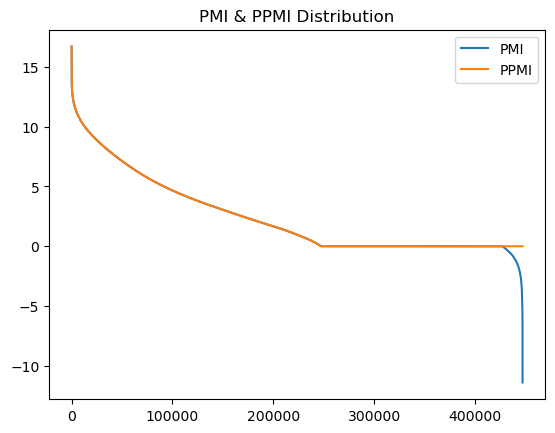

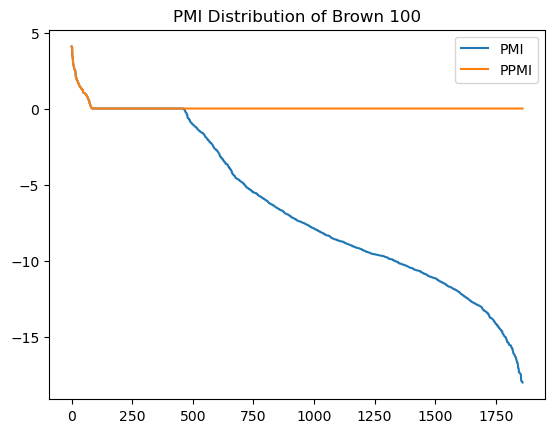

In [4]:
from matplotlib import pyplot as plt

_, pmi = zip(*bigram2pmi.most_common(len(bigram_counter)))
_, pmi_100 = zip(*bigram2pmi_100.most_common(len(bigram2pmi_100)))
_, ppmi = zip(*bigram2ppmi.most_common(len(bigram2ppmi)))
_, ppmi_100 = zip(*bigram2ppmi_100.most_common(len(bigram2ppmi_100)))

plt.title("PMI & PPMI Distribution")
plt.plot(pmi, label="PMI")
plt.plot(ppmi, label="PPMI")
plt.legend()
plt.show()

plt.title("PMI Distribution of Brown 100")
plt.plot(pmi_100, label="PMI")
plt.plot(ppmi_100, label="PPMI")
plt.legend()
plt.show()

In the whole corpus the association between two words in a bigram are stronger.
There are more pairs with higher PMI/PPMI values in the whole corpus, and the maximum PMI/PPMI are higher.
This suggests a different word distribution between the whole corpus and brown_100.txt.

## Step 4

PPMI and PMI only differ when the PMI is negative.
By setting the negative values to zero, PPMI avoids an accidental bigram(possibly erroneous) from influencing the downstream tasks.
It is also harder to interpret and utilize the negative values in the downstream tasks.

As we spotted in step 1, bigrams with negative PMI, for example, the bigram ('and', 'and') is an error instead of a meaningful sentence structure.
It might make sense to forbid these kind of structure to be generated in the downstream tasks.
However, this leads to another problem that bigrams like ('to', 'was') is unlikely to appear but possible in a sentence.
Setting their PMI all to zero will just treat them like independent words, allowing a lower but non-zero probability.   